# Agentic AI-Based Customer Support System - Evaluation Analysis

This notebook analyzes the evaluation results of the multi-agent customer support system. It displays the test results in a table format and provides insights on system performance.

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the evaluation results
try:
    with open('agent_evaluation_results.json', 'r') as f:
        data = json.load(f)
    print(f"Successfully loaded {len(data)} test results.")
except FileNotFoundError:
    print("Error: agent_evaluation_results.json not found. Please run the evaluation script first.")
    data = []

Successfully loaded 78 test results.


## Test Results Table

Displaying all test results in a comprehensive table format:

In [3]:
if data:
    # Create a DataFrame from the results
    df = pd.DataFrame(data)
    
    # Display the full table
    df_display = df[['test_case', 'query_classifier', 'solution_agent', 'followup_agent', 
                     'rag_agent', 'document_summarizer', 'total_response_time', 'status']].copy()
    
    # Style the table
    styled_df = df_display.style.set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #dee2e6',
        'text-align': 'left',
        'color': 'black'
    }).set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4e73df'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '8px')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
    ])
    
    # Ensure the styled DataFrame is rendered in the notebook
    from IPython.display import display
    display(styled_df)

,test_case,query_classifier,solution_agent,followup_agent,rag_agent,document_summarizer,total_response_time,status
0,"Test case: ""I have a headache for 2 days""",20.26s,2.35s,2.23s,N/A (Not needed for this query),N/A (Not needed for this query),24.84s,Pass
1,"Test case: ""I'm experiencing chest pain and shortness of breath""",3.00s,1.64s,1.09s,N/A (Not needed for this query),N/A (Not needed for this query),5.73s,Pass
2,"Test case: ""I've had a fever and cough for three days""",3.35s,1.43s,1.11s,N/A (Not needed for this query),N/A (Not needed for this query),5.89s,Pass
3,"Test case: ""I'm feeling dizzy and nauseous""",3.19s,1.50s,1.28s,N/A (Not needed for this query),N/A (Not needed for this query),5.98s,Pass
4,"Test case: ""I have severe abdominal pain""",3.07s,1.54s,1.38s,N/A (Not needed for this query),N/A (Not needed for this query),6.00s,Pass
5,"Test case: ""I've been having frequent migraines lately""",4.63s,2.49s,1.18s,N/A (Not needed for this query),N/A (Not needed for this query),8.31s,Pass
6,"Test case: ""I'm experiencing joint pain and stiffness""",4.00s,1.44s,0.98s,N/A (Not needed for this query),N/A (Not needed for this query),6.43s,Pass
7,"Test case: ""I have a persistent sore throat and difficulty swallowing""",3.32s,1.72s,1.17s,N/A (Not needed for this query),N/A (Not needed for this query),6.22s,Pass
8,"Test case: ""Can I see a cardiologist?""",17.85s,3.63s,1.90s,9.68s,N/A (Not needed for this query),33.06s,Pass
9,"Test case: ""Do you have psychologists available?""",3.31s,1.79s,1.70s,4.36s,N/A (Not needed for this query),11.15s,Pass


## Performance Metrics

Analyzing response times and success rates:

In [4]:
if data:
    import pandas as pd
    import numpy as np

    # Create DataFrame
    df = pd.DataFrame(data)

    # Extract numerical response times (in seconds)
    df['qc_time'] = df['query_classifier'].str.extract(r'([0-9]+\.?[0-9]*)').astype(float)
    df['sol_time'] = df['solution_agent'].str.extract(r'([0-9]+\.?[0-9]*)').astype(float)
    df['followup_time'] = df['followup_agent'].str.extract(r'([0-9]+\.?[0-9]*)').astype(float)
    df['total_time'] = df['total_response_time'].str.extract(r'([0-9]+\.?[0-9]*)').astype(float)

    # --- ✅ Evaluation Metrics ---

    # Success & failure counts
    total_cases = len(df)
    pass_cases = (df['status'] == 'Pass').sum()
    fail_cases = total_cases - pass_cases
    success_rate = pass_cases / total_cases * 100
    failure_rate = 100 - success_rate

    print("=== EVALUATION METRICS ===")
    print(f"Total Test Cases     : {total_cases}")
    print(f"✅ Passed             : {pass_cases}")
    print(f"❌ Failed             : {fail_cases}")
    print(f"🎯 Success Rate       : {success_rate:.2f}%")
    print(f"⚠️  Failure Rate       : {failure_rate:.2f}%")

    print("\n=== RESPONSE TIME STATISTICS (seconds) ===")
    def describe_time(col):
        return f"Mean: {df[col].mean():.2f}s | Median: {df[col].median():.2f}s | Max: {df[col].max():.2f}s | Min: {df[col].min():.2f}s | Std: {df[col].std():.2f}s"

    print(f"Query Classifier  → {describe_time('qc_time')}")
    print(f"Solution Agent    → {describe_time('sol_time')}")
    print(f"Follow-up Agent   → {describe_time('followup_time')}")
    print(f"Total Response    → {describe_time('total_time')}")

    # --- Optional: Correlation (for insight) ---
    print("\n=== CORRELATION ANALYSIS ===")
    corr = df[['qc_time', 'sol_time', 'followup_time', 'total_time']].corr()
    print(corr)

    # --- Optional: Simple performance grading ---
    print("\n=== PERFORMANCE GRADE ===")
    if success_rate >= 95:
        print("🏆 Excellent")
    elif success_rate >= 85:
        print("👍 Good")
    elif success_rate >= 70:
        print("⚙️  Average")
    else:
        print("❌ Needs Improvement")


=== EVALUATION METRICS ===
Total Test Cases     : 78
✅ Passed             : 78
❌ Failed             : 0
🎯 Success Rate       : 100.00%
⚠️  Failure Rate       : 0.00%

=== RESPONSE TIME STATISTICS (seconds) ===
Query Classifier  → Mean: 4.24s | Median: 3.12s | Max: 20.26s | Min: 1.97s | Std: 3.80s
Solution Agent    → Mean: 2.30s | Median: 2.21s | Max: 5.96s | Min: 1.43s | Std: 0.72s
Follow-up Agent   → Mean: 1.38s | Median: 1.31s | Max: 2.57s | Min: 0.91s | Std: 0.38s
Total Response    → Mean: 9.27s | Median: 7.04s | Max: 33.06s | Min: 4.93s | Std: 5.76s

=== CORRELATION ANALYSIS ===
                qc_time  sol_time  followup_time  total_time
qc_time        1.000000  0.236638       0.615175    0.893558
sol_time       0.236638  1.000000       0.197084    0.295334
followup_time  0.615175  0.197084       1.000000    0.575743
total_time     0.893558  0.295334       0.575743    1.000000

=== PERFORMANCE GRADE ===
🏆 Excellent


## Agent Usage Analysis

Analyzing which agents were used in different test scenarios:

In [5]:
if data:
    import pandas as pd
    from IPython.display import display

    df = pd.DataFrame(data)

    # --- 1️⃣ AGENT USAGE ANALYSIS ---
    rag_needed = (df['rag_agent'] != 'N/A (Not needed for this query)').sum()
    doc_sum_needed = (df['document_summarizer'] != 'N/A (Not needed for this query)').sum()

    print("=== AGENT USAGE ANALYSIS ===")
    print(f"RAG Agent Used: {rag_needed}/{len(df)} tests ({rag_needed/len(df)*100:.1f}%)")
    print(f"Document Summarizer Used: {doc_sum_needed}/{len(df)} tests ({doc_sum_needed/len(df)*100:.1f}%)\n")

    # --- 2️⃣ TEST CASE CATEGORIZATION (DYNAMIC) ---

    # Define your categories and their trigger keywords
    category_keywords = {
        "Symptom Inquiries": ["headache", "chest pain", "fever", "dizzy", "abdominal"],
        "Emergency Cases": ["emergency", "heart attack", "stroke", "poisoned"],
        "Doctor Inquiries": ["cardiologist", "psychologist", "neurologist", "dermatologist", "pediatrician"],
        "Appointment Requests": ["appointment", "book"],
        "Center Information": ["hours", "located", "parking", "services"],
        "Document Requests": ["doc:", "document", "report"],
        "General Health": ["exercise", "sleep", "diet", "stress"],
        "Medicine Questions": ["aspirin", "antibiotic", "medication", "dose"],
        "Responsible AI": ["licensed doctor", "replace", "data protected", "confidential"],
        "Crisis Intervention": ["don't want to live", "harming myself", "suicide", "kill myself"],
    }

    # Initialize counts
    category_counts = {cat: 0 for cat in category_keywords}
    category_counts["Other"] = 0  # Default fallback

    # --- Categorize dynamically ---
    for _, row in df.iterrows():
        test_text = str(row["test_case"]).lower()
        matched = False
        for category, keywords in category_keywords.items():
            if any(word in test_text for word in keywords):
                category_counts[category] += 1
                matched = True
                break
        if not matched:
            category_counts["Other"] += 1

    # --- Display results ---
    print("=== TEST CASE CATEGORY DISTRIBUTION ===")
    for cat, count in category_counts.items():
        if count > 0:
            print(f"  {cat:<25} : {count}")

    # --- 3️⃣ Optional: Summary Table / Visualization ---
    df_summary = pd.DataFrame(list(category_counts.items()), columns=["Category", "Count"])
    df_summary = df_summary[df_summary["Count"] > 0].sort_values("Count", ascending=False)

    display(df_summary.style.background_gradient(cmap="Blues").set_caption("Category Distribution"))


=== AGENT USAGE ANALYSIS ===
RAG Agent Used: 19/78 tests (24.4%)
Document Summarizer Used: 5/78 tests (6.4%)

=== TEST CASE CATEGORY DISTRIBUTION ===
  Symptom Inquiries         : 5
  Doctor Inquiries          : 5
  Appointment Requests      : 4
  Center Information        : 5
  Document Requests         : 6
  General Health            : 4
  Medicine Questions        : 4
  Responsible AI            : 3
  Crisis Intervention       : 3
  Other                     : 39


,Category,Count
10,Other,39
5,Document Requests,6
2,Doctor Inquiries,5
0,Symptom Inquiries,5
4,Center Information,5
3,Appointment Requests,4
6,General Health,4
7,Medicine Questions,4
8,Responsible AI,3
9,Crisis Intervention,3


## Detailed Insights

Key findings from the evaluation:

In [6]:
import pandas as pd
import numpy as np
from IPython.display import display

# Assuming 'data' is your list/dictionary of test results
if data:
    # Create DataFrame
    df = pd.DataFrame(data)

    # --- 1️⃣ Extract numeric values from columns ---
    df['qc_time'] = df['query_classifier'].str.extract(r'([0-9]+\.?[0-9]*)')[0].astype(float)
    df['sol_time'] = df['solution_agent'].str.extract(r'([0-9]+\.?[0-9]*)')[0].astype(float)
    df['followup_time'] = df['followup_agent'].str.extract(r'([0-9]+\.?[0-9]*)')[0].astype(float)

    # Extract total response time as numeric seconds
    df['total_time'] = df['total_response_time'].str.extract(r'([0-9]+\.?[0-9]*)')[0].astype(float)

    # --- 2️⃣ Overall Success Rate ---
    success_rate = (df['status'] == 'Pass').sum() / len(df) * 100

    # --- 3️⃣ Agent Usage ---
    rag_needed = (df['rag_agent'] != 'N/A (Not needed for this query)').sum()
    doc_sum_needed = (df['document_summarizer'] != 'N/A (Not needed for this query)').sum()

    # --- 4️⃣ Performance Metrics & Ratings ---
    avg_total_time = df['total_time'].mean()

    if avg_total_time < 20:
        performance_rating = "🏆 Excellent (under 20s)"
    elif avg_total_time < 40:
        performance_rating = "👍 Good (20–40s)"
    elif avg_total_time < 60:
        performance_rating = "⚙️ Fair (40–60s)"
    else:
        performance_rating = "🐢 Poor (over 60s)"

    # Reliability rating
    if success_rate >= 95:
        reliability_rating = "✅ Highly Reliable"
    elif success_rate >= 85:
        reliability_rating = "🟢 Reliable"
    elif success_rate >= 75:
        reliability_rating = "🟡 Moderately Reliable"
    else:
        reliability_rating = "🔴 Needs Improvement"

    # Agent usage insights
    rag_usage_rate = (rag_needed / len(df)) * 100
    if rag_usage_rate > 40:
        rag_insight = "📚 RAG agent is frequently utilized → strong KB integration"
    elif rag_usage_rate > 15:
        rag_insight = "💡 RAG agent moderately used → balanced LLM + KB usage"
    else:
        rag_insight = "🤖 RAG agent usage is low → LLM handles most queries directly"

    if doc_sum_needed > 0:
        doc_insight = f"📄 Document summarizer used in {doc_sum_needed} cases ({doc_sum_needed/len(df)*100:.1f}%)"
    else:
        doc_insight = "📄 Document summarization not triggered"

    # --- 5️⃣ Print Insights ---
    print("=== DETAILED INSIGHTS ===")
    print(f"1️⃣ Overall Performance: {performance_rating} — Avg: {avg_total_time:.2f}s")
    print(f"2️⃣ System Reliability: {reliability_rating} — Success rate: {success_rate:.1f}%")
    print(f"3️⃣ Knowledge Base Usage: {rag_insight}")
    print(f"4️⃣ Document Processing: {doc_insight}")

    # --- 6️⃣ Optional: Top 3 Slowest & Fastest Cases ---
    slowest_cases = df.nlargest(3, 'total_time')[['test_case', 'total_response_time']]
    fastest_cases = df.nsmallest(3, 'total_time')[['test_case', 'total_response_time']]

    print("\n5️⃣ Performance Bottlenecks (Top 3 slowest):")
    for _, row in slowest_cases.iterrows():
        print(f"🐢 {row['test_case']} → {row['total_response_time']}")

    print("\n6️⃣ Best Performing Cases (Top 3 fastest):")
    for _, row in fastest_cases.iterrows():
        print(f"⚡ {row['test_case']} → {row['total_response_time']}")


=== DETAILED INSIGHTS ===
1️⃣ Overall Performance: 🏆 Excellent (under 20s) — Avg: 9.27s
2️⃣ System Reliability: ✅ Highly Reliable — Success rate: 100.0%
3️⃣ Knowledge Base Usage: 💡 RAG agent moderately used → balanced LLM + KB usage
4️⃣ Document Processing: 📄 Document summarizer used in 5 cases (6.4%)

5️⃣ Performance Bottlenecks (Top 3 slowest):
🐢 Test case: "Can I see a cardiologist?" → 33.06s
🐢 Test case: "I want to book an appointment with a doctor" → 32.22s
🐢 Test case: "What are your opening hours?" → 28.99s

6️⃣ Best Performing Cases (Top 3 fastest):
⚡ Test case: "Will my information be shared with third parties?" → 4.93s
⚡ Test case: "Thank you, goodbye" → 4.93s
⚡ Test case: "Take care" → 5.01s


## Visualization

Response time distribution across different agents:

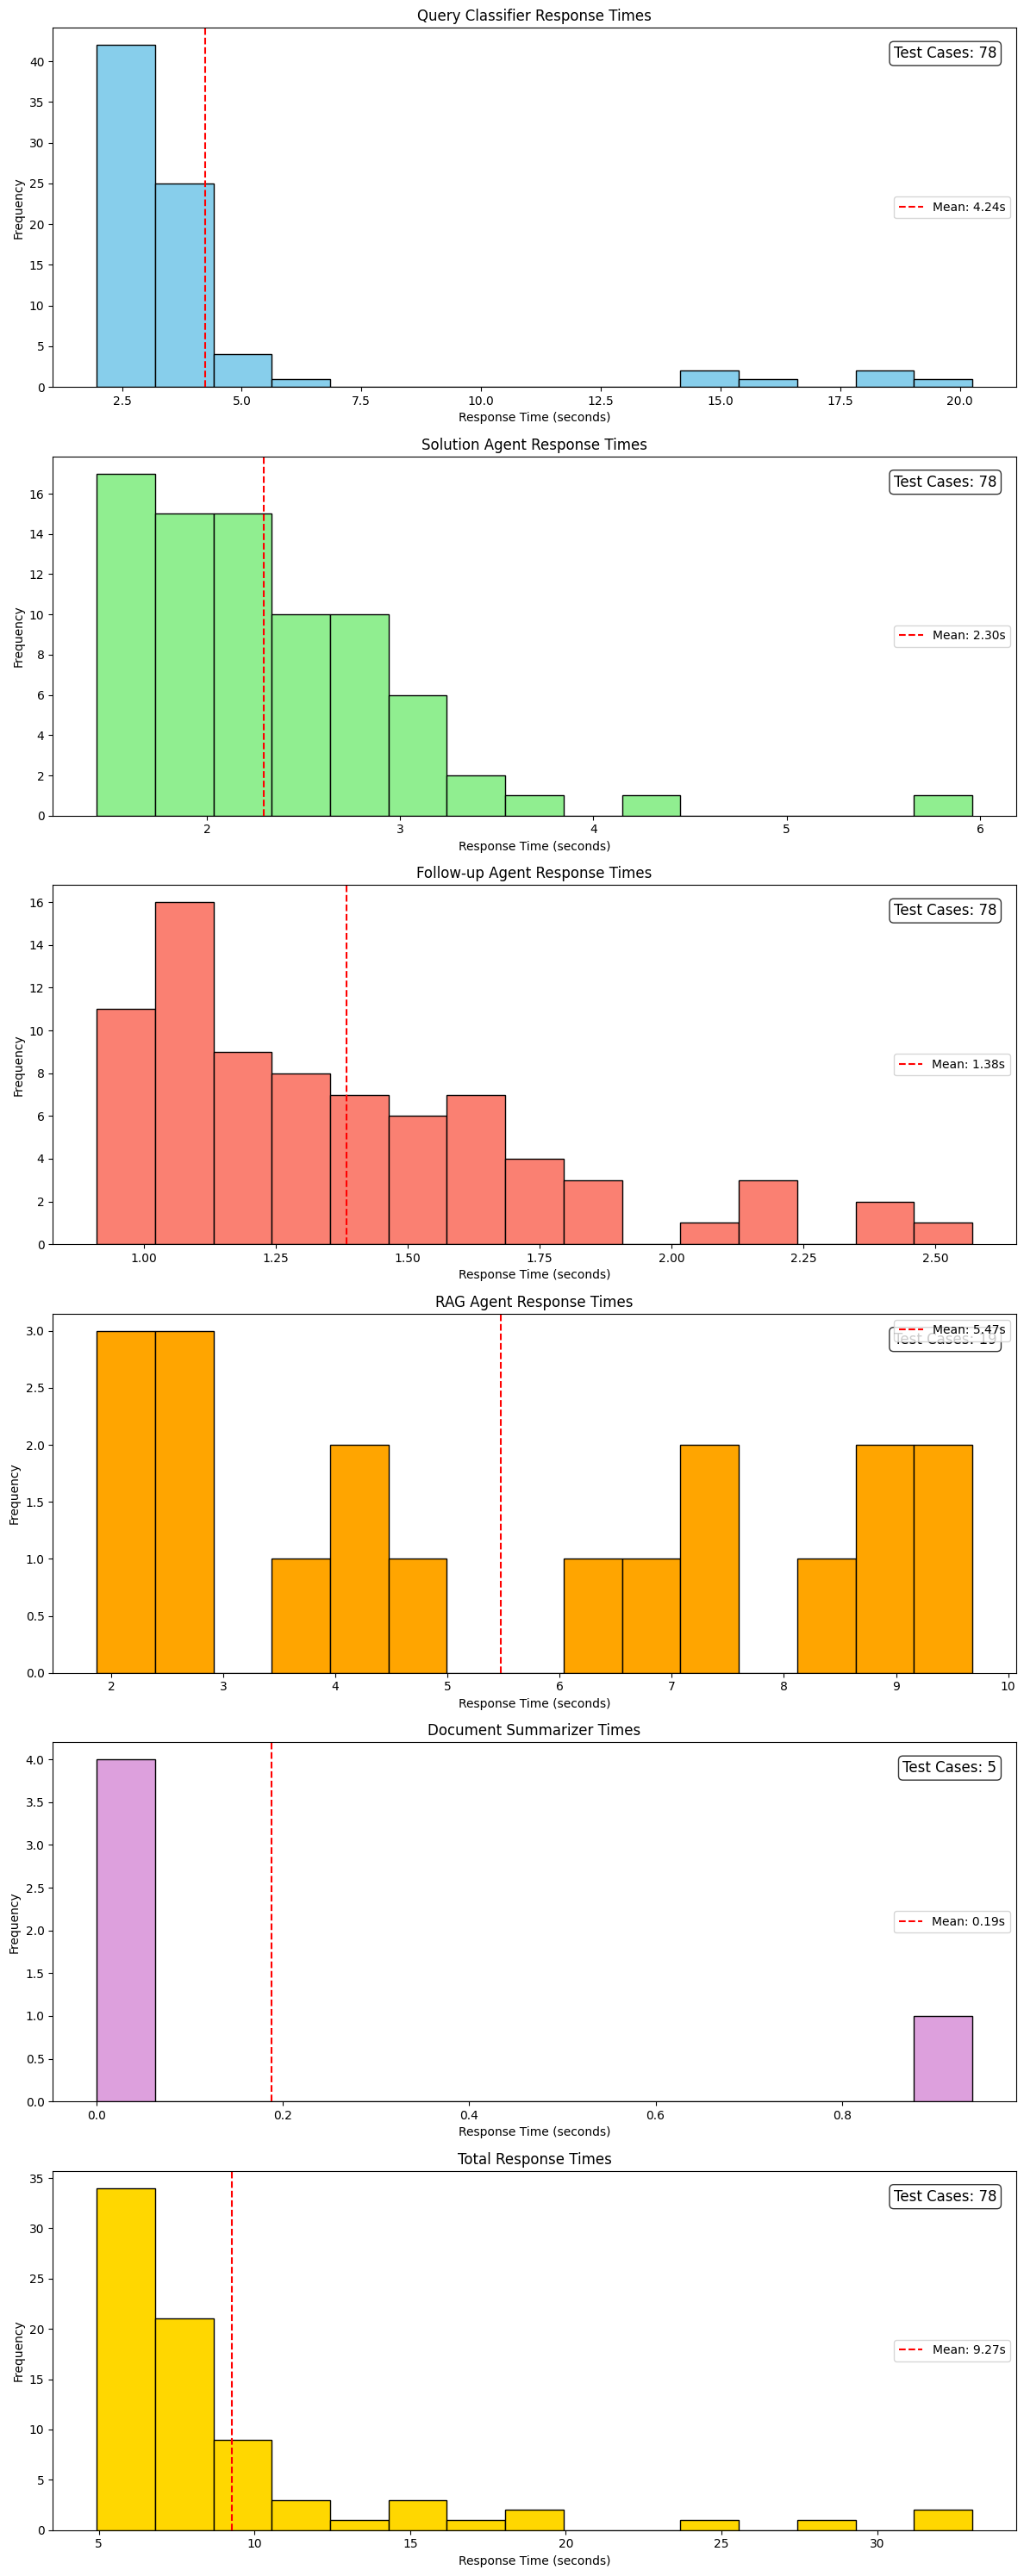

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

if data:
    # Ensure numeric columns
    df['total_time'] = pd.to_numeric(df['total_response_time'].str.extract(r'([0-9]+\.?[0-9]*)')[0], errors='coerce')
    df['doc_time'] = pd.to_numeric(df['document_summarizer'].str.extract(r'([0-9]+\.?[0-9]*)')[0], errors='coerce')
    df['rag_time'] = pd.to_numeric(df['rag_agent'].str.extract(r'([0-9]+\.?[0-9]*)')[0], errors='coerce')  # RAG agent

    # Create 6 vertical subplots
    fig, axes = plt.subplots(6, 1, figsize=(12, 30))
    

    # Helper function for plotting histograms with test case count
    def plot_hist(ax, series, title, color):
        series_clean = series.dropna()
        count = len(series_clean)
        if series_clean.empty:
            ax.text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center', fontsize=14)
        else:
            ax.hist(series_clean, bins=15, color=color, edgecolor='black')
            mean_val = series_clean.mean()
            ax.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}s")
            # Side annotation for number of test cases
            ax.text(0.98, 0.95, f'Test Cases: {count}', transform=ax.transAxes,
                    fontsize=12, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        ax.set_title(title)
        ax.set_xlabel('Response Time (seconds)')
        ax.set_ylabel('Frequency')
        ax.legend()

    # Plot each chart in desired order
    plot_hist(axes[0], df['qc_time'], 'Query Classifier Response Times', 'skyblue')
    plot_hist(axes[1], df['sol_time'], 'Solution Agent Response Times', 'lightgreen')
    plot_hist(axes[2], df['followup_time'], 'Follow-up Agent Response Times', 'salmon')
    plot_hist(axes[3], df['rag_time'], 'RAG Agent Response Times', 'orange')
    plot_hist(axes[4], df['doc_time'], 'Document Summarizer Times', 'plum')
    plot_hist(axes[5], df['total_time'], 'Total Response Times', 'gold')

    plt.tight_layout()
    plt.show()


## Recommendations

Based on the evaluation results, here are some recommendations for system improvement:

In [8]:
if data:
    print("=== RECOMMENDATIONS ===")
    
    # Performance recommendations
    if avg_total_time > 10:
        print("1. Performance Optimization: Consider optimizing agent response times, particularly for the Query Classifier.")
    
    # Reliability recommendations
    if success_rate < 95:
        print("2. Reliability Improvement: Investigate failed test cases to improve system robustness.")
    
    # Feature usage recommendations
    if rag_needed < len(df) * 0.2:
        print("3. Knowledge Base Enhancement: Expand the knowledge base to handle more query types through RAG.")
    
    if doc_sum_needed == 0:
        print("4. Document Processing Testing: Include more document processing test cases to validate this feature.")
    
    # Test coverage recommendations
    if category_counts['Responsible AI'] == 0:
        print("5. Ethical AI Testing: Add more Responsible AI test cases to ensure ethical compliance.")
    
    if category_counts['Crisis Intervention'] == 0:
        print("6. Crisis Handling Validation: Include more crisis intervention scenarios to ensure proper handling.")
    
    print()
    print("7. Continuous Monitoring: Implement ongoing performance monitoring to track system improvements.")
    print("8. User Experience: Consider implementing response time indicators for better user experience.")
    print("9. Scalability Testing: Conduct load testing to evaluate system performance under high demand.")
    print("10. Security Review: Regularly audit data handling practices to ensure user privacy protection.")

=== RECOMMENDATIONS ===

7. Continuous Monitoring: Implement ongoing performance monitoring to track system improvements.
8. User Experience: Consider implementing response time indicators for better user experience.
9. Scalability Testing: Conduct load testing to evaluate system performance under high demand.
10. Security Review: Regularly audit data handling practices to ensure user privacy protection.
